# Song Lyrics Classifier: Lennon vs McCartney

In [2]:
import pandas as pd
import re
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import keras
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [3]:
np.random.seed(42)

In [4]:
#The lyrics for 'Abbey Road' and 'Let It Be' Beatles albums have been scraped from a different site 
#and therefore saved separately from the rest of the Beatles songs.
df = pd.read_csv('./Beatles_lyrics_Abbey_Road.csv')

In [5]:
Abbey_Road=df

In [6]:
Abbey_Road.head()

,song_title,lyrics
0,\r\nCome Together Lyrics,"[Intro: John Lennon]\r\nShoot me, shoot me, sh..."
1,\r\nSomething Lyrics,[Verse 1]\r\nSomething in the way she moves\r\...
2,\r\nMaxwell's Silver Hammer Lyrics,[Verse 1]\r\nJoan was quizzical; studied patap...
3,\r\nOh! Darling Lyrics,"[Verse 1]\r\nOh! Darling, please believe me\r\..."
4,\r\nOctopus's Garden Lyrics,[Chorus]\r\nI’d like to be under the sea\r\nIn...


In [7]:
df_1 = pd.read_csv('./Beatles_lyrics_Let_It_Be.csv')


In [8]:
Let_It_Be=df_1

In [9]:
Let_It_Be.head()

,song_title,lyrics
0,\r\nTwo of Us Lyrics,I Dig a Pygmy by Charles Hawtrey and the Deaf ...
1,\r\nDig a Pony Lyrics,"[Verse 1]\r\nI dig a pony\r\nWell, you can cel..."
2,\r\nAcross the Universe Lyrics,[Verse 1: John Lennon]\r\nWords are flowing ou...
3,\r\nI Me Mine Lyrics,"[Verse 1]\r\nAll through the day, I me mine\r\..."
4,\r\nDig It Lyrics,[Verse]\r\nLike a rolling stone\r\nLike a roll...


In [10]:
#Since the maindataframe containing the majority of the Beatles lyrics has album column, 
#let's add the album column here as well.
Abbey_Road['album']='Abbey_Road'

In [11]:
Abbey_Road.head()

,song_title,lyrics,album
0,\r\nCome Together Lyrics,"[Intro: John Lennon]\r\nShoot me, shoot me, sh...",Abbey_Road
1,\r\nSomething Lyrics,[Verse 1]\r\nSomething in the way she moves\r\...,Abbey_Road
2,\r\nMaxwell's Silver Hammer Lyrics,[Verse 1]\r\nJoan was quizzical; studied patap...,Abbey_Road
3,\r\nOh! Darling Lyrics,"[Verse 1]\r\nOh! Darling, please believe me\r\...",Abbey_Road
4,\r\nOctopus's Garden Lyrics,[Chorus]\r\nI’d like to be under the sea\r\nIn...,Abbey_Road


In [12]:
Let_It_Be['album']='Let_It_Be'

In [13]:
Let_It_Be.head()

,song_title,lyrics,album
0,\r\nTwo of Us Lyrics,I Dig a Pygmy by Charles Hawtrey and the Deaf ...,Let_It_Be
1,\r\nDig a Pony Lyrics,"[Verse 1]\r\nI dig a pony\r\nWell, you can cel...",Let_It_Be
2,\r\nAcross the Universe Lyrics,[Verse 1: John Lennon]\r\nWords are flowing ou...,Let_It_Be
3,\r\nI Me Mine Lyrics,"[Verse 1]\r\nAll through the day, I me mine\r\...",Let_It_Be
4,\r\nDig It Lyrics,[Verse]\r\nLike a rolling stone\r\nLike a roll...,Let_It_Be


In [14]:
#Since both dataframes come from the same source and have the same format, we merge them.
last_two_albums = Abbey_Road.append(Let_It_Be,ignore_index=True)
last_two_albums



,song_title,lyrics,album
0,\r\nCome Together Lyrics,"[Intro: John Lennon]\r\nShoot me, shoot me, sh...",Abbey_Road
1,\r\nSomething Lyrics,[Verse 1]\r\nSomething in the way she moves\r\...,Abbey_Road
2,\r\nMaxwell's Silver Hammer Lyrics,[Verse 1]\r\nJoan was quizzical; studied patap...,Abbey_Road
3,\r\nOh! Darling Lyrics,"[Verse 1]\r\nOh! Darling, please believe me\r\...",Abbey_Road
4,\r\nOctopus's Garden Lyrics,[Chorus]\r\nI’d like to be under the sea\r\nIn...,Abbey_Road
5,\r\nI Want You (She's So Heavy) Lyrics,[Verse]\r\nI want you\r\nI want you so bad\r\n...,Abbey_Road
6,\r\nHere Comes the Sun Lyrics,[Intro]\r\nHere comes the sun (doo doo doo doo...,Abbey_Road
7,\r\nBecause Lyrics,[Verse 1]\r\nBecause the world is round it tur...,Abbey_Road
8,\r\nYou Never Give Me Your Money Lyrics,[Verse 1]\r\nYou never give me your money\r\nY...,Abbey_Road
9,\r\nSun King Lyrics,"[Chorus]\r\nOooh, here comes the sun king\r\nH...",Abbey_Road


In [15]:
#Rows 17 and 30 are not songs and row 22 represents a song that hardly has any lyrics. We will remove them.
last_two_albums.drop([17, 22, 30], inplace=True)

In [16]:
#We dropped some rows, therefore we reset the index.
last_two_albums=last_two_albums.reset_index(drop=True)
last_two_albums

,song_title,lyrics,album
0,\r\nCome Together Lyrics,"[Intro: John Lennon]\r\nShoot me, shoot me, sh...",Abbey_Road
1,\r\nSomething Lyrics,[Verse 1]\r\nSomething in the way she moves\r\...,Abbey_Road
2,\r\nMaxwell's Silver Hammer Lyrics,[Verse 1]\r\nJoan was quizzical; studied patap...,Abbey_Road
3,\r\nOh! Darling Lyrics,"[Verse 1]\r\nOh! Darling, please believe me\r\...",Abbey_Road
4,\r\nOctopus's Garden Lyrics,[Chorus]\r\nI’d like to be under the sea\r\nIn...,Abbey_Road
5,\r\nI Want You (She's So Heavy) Lyrics,[Verse]\r\nI want you\r\nI want you so bad\r\n...,Abbey_Road
6,\r\nHere Comes the Sun Lyrics,[Intro]\r\nHere comes the sun (doo doo doo doo...,Abbey_Road
7,\r\nBecause Lyrics,[Verse 1]\r\nBecause the world is round it tur...,Abbey_Road
8,\r\nYou Never Give Me Your Money Lyrics,[Verse 1]\r\nYou never give me your money\r\nY...,Abbey_Road
9,\r\nSun King Lyrics,"[Chorus]\r\nOooh, here comes the sun king\r\nH...",Abbey_Road


In [17]:
#We need to cleanup the song titles.
last_two_albums.song_title = last_two_albums.song_title.str.replace('Lyrics','').str.replace('\r\n','')

In [18]:
last_two_albums.head()

,song_title,lyrics,album
0,Come Together,"[Intro: John Lennon]\r\nShoot me, shoot me, sh...",Abbey_Road
1,Something,[Verse 1]\r\nSomething in the way she moves\r\...,Abbey_Road
2,Maxwell's Silver Hammer,[Verse 1]\r\nJoan was quizzical; studied patap...,Abbey_Road
3,Oh! Darling,"[Verse 1]\r\nOh! Darling, please believe me\r\...",Abbey_Road
4,Octopus's Garden,[Chorus]\r\nI’d like to be under the sea\r\nIn...,Abbey_Road


In [19]:
#We change the order of columns because they will need to be the same as in the main dataframe.
last_two_albums=last_two_albums[['album', 'song_title', 'lyrics']]
last_two_albums.head()

,album,song_title,lyrics
0,Abbey_Road,Come Together,"[Intro: John Lennon]\r\nShoot me, shoot me, sh..."
1,Abbey_Road,Something,[Verse 1]\r\nSomething in the way she moves\r\...
2,Abbey_Road,Maxwell's Silver Hammer,[Verse 1]\r\nJoan was quizzical; studied patap...
3,Abbey_Road,Oh! Darling,"[Verse 1]\r\nOh! Darling, please believe me\r\..."
4,Abbey_Road,Octopus's Garden,[Chorus]\r\nI’d like to be under the sea\r\nIn...


In [20]:
#Now let's start cleaning the lyrics column. Since this dataframe has a different format than the main dataframe, we clean
#it first.
last_two_albums['lyrics'].iloc[0]

'[Intro: John Lennon]\r\nShoot me, shoot me, shoot me, shoot me\r\n\r\n[Verse 1: John Lennon]\r\nHere come old flat-top, he come groovin\' up slowly\r\nHe got ju-ju eyeballs, he one holy roller\r\nHe got hair down to his knee\r\nGot to be a joker, he just do what he please\r\n\r\n[Interlude: John Lennon]\r\nShoot me, shoot me, shoot me, shoot me\r\n\r\n[Verse 2: John Lennon]\r\nHe wear no shoeshine, he got toe-jam football\r\nHe got monkey finger, he shoot Coca-Cola\r\nHe say, "I know you, you know me"\r\nOne thing I can tell you is you got to be free\r\n\r\n[Chorus: John Lennon]\r\nCome together, right now\r\nOver me\r\n\r\n[Verse 3: John Lennon]\r\nHe bag production, he got walrus gumboot\r\nHe got Ono sideboard, he one spinal cracker\r\nHe got feet down below his knee\r\nHold you in his armchair, you can feel his disease\r\n\r\n[Chorus: John Lennon]\r\nCome together, right now\r\nOver me\r\n\r\n[Interlude: John Lennon]\r\nShoot me, shoot me\r\nRight!\r\n\r\n[Guitar Solo]\r\n\r\n[Ver

In [21]:
last_two_albums.lyrics=last_two_albums.lyrics.str.replace('\r\n',' ')


In [22]:
last_two_albums['lyrics'].iloc[0]

'[Intro: John Lennon] Shoot me, shoot me, shoot me, shoot me  [Verse 1: John Lennon] Here come old flat-top, he come groovin\' up slowly He got ju-ju eyeballs, he one holy roller He got hair down to his knee Got to be a joker, he just do what he please  [Interlude: John Lennon] Shoot me, shoot me, shoot me, shoot me  [Verse 2: John Lennon] He wear no shoeshine, he got toe-jam football He got monkey finger, he shoot Coca-Cola He say, "I know you, you know me" One thing I can tell you is you got to be free  [Chorus: John Lennon] Come together, right now Over me  [Verse 3: John Lennon] He bag production, he got walrus gumboot He got Ono sideboard, he one spinal cracker He got feet down below his knee Hold you in his armchair, you can feel his disease  [Chorus: John Lennon] Come together, right now Over me  [Interlude: John Lennon] Shoot me, shoot me Right!  [Guitar Solo]  [Verse 4: John Lennon] He roller-coaster, he got early warnin\' He got muddy water, he one mojo filter He say, "One an

In [23]:
#we use some regex code to remove content inside square brackets.
last_two_albums.lyrics=last_two_albums.lyrics.str.replace('\[(.*?)\]',' ')

In [24]:
last_two_albums['lyrics'].iloc[0]

'  Shoot me, shoot me, shoot me, shoot me    Here come old flat-top, he come groovin\' up slowly He got ju-ju eyeballs, he one holy roller He got hair down to his knee Got to be a joker, he just do what he please    Shoot me, shoot me, shoot me, shoot me    He wear no shoeshine, he got toe-jam football He got monkey finger, he shoot Coca-Cola He say, "I know you, you know me" One thing I can tell you is you got to be free    Come together, right now Over me    He bag production, he got walrus gumboot He got Ono sideboard, he one spinal cracker He got feet down below his knee Hold you in his armchair, you can feel his disease    Come together, right now Over me    Shoot me, shoot me Right!       He roller-coaster, he got early warnin\' He got muddy water, he one mojo filter He say, "One and one and one is three" Got to be good-lookin\' \'cause he\'s so hard to see    Come together, right now Over me    Shoot me, shoot me, shoot me, shoot me Ugh!    Come together, yeah Come together, yea

In [25]:
#Now let's pull the lyrics from the main source.
df_main = pd.read_csv('./Beatles_lyrics.csv')

In [26]:
df_main.head()

,album,song_title,lyrics
0,"""Please Please Me""","""I Saw Her Standing There""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
1,"""Please Please Me""","""Misery""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
2,"""Please Please Me""","""Anna (Go To Him)""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
3,"""Please Please Me""","""Chains""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
4,"""Please Please Me""","""Boys""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."


In [27]:
df_main.tail()

,album,song_title,lyrics
154,"""Yellow Submarine""","""Hey Bulldog""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
155,"""Yellow Submarine""","""It's All Too Much""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
156,"""Magical Mystery Tour""","""All You Need Is Love""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
157,"""Yellow Submarine""","""Pepperland""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
158,"""Yellow Submarine""","""Medley: Sea Of Time & Sea Of Holes""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."


In [28]:
# remove strings in song_title and album columns
df_main.song_title=df_main.song_title.str.replace('"','')

In [29]:
df_main.album=df_main.album.str.replace('"','')

In [30]:
df_main.head()

,album,song_title,lyrics
0,Please Please Me,I Saw Her Standing There,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
1,Please Please Me,Misery,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
2,Please Please Me,Anna (Go To Him),"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
3,Please Please Me,Chains,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
4,Please Please Me,Boys,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."


In [31]:
df_main.head()

,album,song_title,lyrics
0,Please Please Me,I Saw Her Standing There,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
1,Please Please Me,Misery,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
2,Please Please Me,Anna (Go To Him),"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
3,Please Please Me,Chains,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
4,Please Please Me,Boys,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."


In [32]:
df_main.tail(80)

,album,song_title,lyrics
79,Rubber Soul,In My Life,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
80,Rubber Soul,Wait,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
81,Rubber Soul,If I Needed Someone,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
82,Rubber Soul,Run For Your Life,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
83,Revolver,Taxman,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
84,Revolver,Eleanor Rigby,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
85,Revolver,I'm Only Sleeping,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
86,Revolver,Love You To,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
87,Revolver,"Here, There And Everywhere","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
88,Revolver,Yellow Submarine,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."


In [33]:
#Now we merge both lyrics dataframes
df_main =df_main.append(last_two_albums,ignore_index=True)

In [34]:
df_main=df_main.reset_index(drop=True)
df_main.tail()

,album,song_title,lyrics
182,Let_It_Be,I've Got a Feeling,"I've got a feeling, a feeling deep inside Oh..."
183,Let_It_Be,One After 909,My baby says she's travelling on the one aft...
184,Let_It_Be,The Long and Winding Road,The long and winding road that leads to your...
185,Let_It_Be,For You Blue,(Queen says no to pot-smoking FBI members) ...
186,Let_It_Be,Get Back (Let It Be version),Rosetta... Sweet Loretta Fart she thought she ...


In [35]:
#Remove white space from the titles.
df_main.song_title = df_main.song_title.str.strip()

In [36]:
#Since we will be merging this dataframe with the song author dataframe on song title,
#we create a new column with title all caps to make the merge easier.
df_main['song_title_allcap'] = df_main['song_title']

In [37]:
df_main.song_title_allcap=df_main.song_title_allcap.str.upper()

In [38]:
df_main.song_title_allcap=df_main.song_title_allcap.str.replace(',','')

In [39]:
df_main.head()

,album,song_title,lyrics,song_title_allcap
0,Please Please Me,I Saw Her Standing There,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",I SAW HER STANDING THERE
1,Please Please Me,Misery,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",MISERY
2,Please Please Me,Anna (Go To Him),"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",ANNA (GO TO HIM)
3,Please Please Me,Chains,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",CHAINS
4,Please Please Me,Boys,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",BOYS


In [40]:
#Now we pull the file containing song titles and their authors.
df_authors = pd.read_csv('./Beatles_songs_authors.csv')

In [41]:
df_authors.tail(50)

,author,title_1
261,LennonMcCartney,"""Thank You Girl"""
262,McCartney,"""That Means a Lot"""
263,Jerry AllisonBuddy HollyNorman Petty,"""That'll Be the Day"""
264,Arthur Crudup,"""That’s All Right (Mama)"""
265,LennonMcCartney,"""There's a Place"""
266,McCartney,"""Things We Said Today"""
267,Harrison,"""Think for Yourself"""
268,Lennon,"""This Boy"""
269,Jerry Leiber and Mike Stoller,"""Three Cool Cats"""
270,Lennon,"""Ticket to Ride"""


In [42]:
df_authors.title_1=df_authors.title_1.str.replace('"','')

In [43]:
df_authors.head()

,author,title_1
0,John LennonPaul McCartneyGeorge HarrisonRingo ...,12-Bar Original
1,Lennon,Across the Universe
2,Johnny RussellVoni Morrison,Act Naturally
3,Jack YellenMilton Ager,Ain't She Sweet
4,Lennon,All I've Got to Do


In [44]:
df_authors.title_1 = df_authors.title_1.str.strip()

In [45]:
#let's create all cap song title column here as well.
df_authors['song_title_allcap'] = df_authors['title_1']

In [46]:
df_authors.head()

,author,title_1,song_title_allcap
0,John LennonPaul McCartneyGeorge HarrisonRingo ...,12-Bar Original,12-Bar Original
1,Lennon,Across the Universe,Across the Universe
2,Johnny RussellVoni Morrison,Act Naturally,Act Naturally
3,Jack YellenMilton Ager,Ain't She Sweet,Ain't She Sweet
4,Lennon,All I've Got to Do,All I've Got to Do


In [47]:
df_authors.song_title_allcap=df_authors.song_title_allcap.str.upper()

In [48]:
df_authors.song_title_allcap=df_authors.song_title_allcap.str.replace(',','')

In [49]:
df_authors.tail(100)

,author,title_1,song_title_allcap
211,Harrison,Piggies,PIGGIES
212,Georgia DobbinsWilliam GarrettBrian HollandRob...,Please Mr. Postman,PLEASE MR. POSTMAN
213,Lennon,Please Please Me,PLEASE PLEASE ME
214,Lennon,Polythene Pam,POLYTHENE PAM
215,McCartney(with Lennon),P.S. I Love You,P.S. I LOVE YOU
216,Lennon,Rain,RAIN
217,Lennon,Real Love,REAL LOVE
218,Lennon,Revolution,REVOLUTION
219,Lennon,Revolution 1,REVOLUTION 1
220,Lennon(with Ono and Harrison),Revolution 9,REVOLUTION 9


In [50]:
#Now we are ready to merge.
df_main_1 = pd.merge(df_main, df_authors, on = 'song_title_allcap', how = 'left')

In [51]:
df_main_1.head(70)

,album,song_title,lyrics,song_title_allcap,author,title_1
0,Please Please Me,I Saw Her Standing There,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",I SAW HER STANDING THERE,McCartney(with Lennon),I Saw Her Standing There
1,Please Please Me,Misery,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",MISERY,Lennon(with McCartney),Misery
2,Please Please Me,Anna (Go To Him),"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",ANNA (GO TO HIM),Arthur Alexander,Anna (Go to Him)
3,Please Please Me,Chains,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",CHAINS,Gerry GoffinCarole King,Chains
4,Please Please Me,Boys,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",BOYS,Luther DixonWes Farrell,Boys
5,Please Please Me,Ask Me Why,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",ASK ME WHY,Lennon(with McCartney),Ask Me Why
6,Please Please Me,Please Please Me,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",PLEASE PLEASE ME,Lennon,Please Please Me
7,Please Please Me,Love Me Do,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",LOVE ME DO,McCartney(with Lennon),Love Me Do
8,Please Please Me,P.S. I Love You,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",P.S. I LOVE YOU,McCartney(with Lennon),P.S. I Love You
9,Please Please Me,Baby It's You,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",BABY IT'S YOU,Burt BacharachHal DavidLuther Dixon,Baby It's You


In [52]:
df_main_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 6 columns):
album                187 non-null object
song_title           187 non-null object
lyrics               187 non-null object
song_title_allcap    187 non-null object
author               179 non-null object
title_1              179 non-null object
dtypes: object(6)
memory usage: 10.2+ KB


In [53]:
#Let's assign values manually in the 8 rows with a missing author .
df_main_1.author.iloc[[20,23,47,157,158]] = ('cover')
df_main_1.author.iloc[[105,186]] = ('McCartney')
df_main_1.author.iloc[[148]] = ('Lennon')


In [54]:
df_main_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 6 columns):
album                187 non-null object
song_title           187 non-null object
lyrics               187 non-null object
song_title_allcap    187 non-null object
author               187 non-null object
title_1              179 non-null object
dtypes: object(6)
memory usage: 10.2+ KB


In [55]:
df_main_1['author'].iloc[105]

'McCartney'

In [56]:
df_main_1.tail(50)

,album,song_title,lyrics,song_title_allcap,author,title_1
137,The Beatles (The White Album),Julia,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",JULIA,Lennon,Julia
138,The Beatles (The White Album),Birthday,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",BIRTHDAY,LennonMcCartney,Birthday
139,The Beatles (The White Album),Yer Blues,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",YER BLUES,Lennon,Yer Blues
140,The Beatles (The White Album),Mother Nature's Son,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",MOTHER NATURE'S SON,McCartney,Mother Nature's Son
141,The Beatles (The White Album),Everybody's Got Something To Hide Except Me An...,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",EVERYBODY'S GOT SOMETHING TO HIDE EXCEPT ME AN...,Lennon,Everybody's Got Something to Hide Except Me an...
142,The Beatles (The White Album),Sexy Sadie,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",SEXY SADIE,Lennon,Sexy Sadie
143,The Beatles (The White Album),Helter Skelter,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",HELTER SKELTER,McCartney,Helter Skelter
144,The Beatles (The White Album),"Long, Long, Long","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",LONG LONG LONG,Harrison,"Long, Long, Long"
145,The Beatles (The White Album),Revolution 1,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",REVOLUTION 1,Lennon,Revolution 1
146,The Beatles (The White Album),Honey Pie,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",HONEY PIE,McCartney,Honey Pie


In [57]:
#we will cross validate the song ownership against the Beatles Bible and assign new values, if necessary.
df_main_authors_adj=df_main_1
df_main_authors_adj.author.iloc[[5,12,14,35,41,55,72,76,79,82,91,93,181]] = ('Lennon')
df_main_authors_adj.author.iloc[[8,22,32,65,75,84,88,90,100,110,133]] = ('McCartney')

In [58]:
#Let's cleanup the author column.
df_main_authors_adj.author.unique()

array(['McCartney(with Lennon)', 'Lennon(with McCartney)',
       'Arthur Alexander ', 'Gerry GoffinCarole King ',
       'Luther DixonWes Farrell ', 'Lennon', 'McCartney',
       'Burt BacharachHal DavidLuther Dixon ', 'Bobby ScottRic Marlow ',
       'Phil MedleyBert Berns ', 'Harrison', 'LennonMcCartney',
       'Meredith Willson ', 'cover', 'Chuck Berry ',
       'Drapkin (a.k.a. Ricky Dee) ', 'Berry GordyJanie Bradford ',
       'Roy Lee Johnson ', 'Buddy Holly ', 'Carl Perkins ',
       'Johnny RussellVoni Morrison ', 'Larry Williams ',
       'LennonMcCartneyHarrisonStarr', 'Starr[d]',
       'Lennon(with Ono and Harrison)', 'McCartney[36]', 'McCartney[29]',
       'Lennon[25]', 'McCartney[39]', 'Lennon[37]'], dtype=object)

In [59]:
df_main_authors_adj.author=df_main_authors_adj.author.str.replace(r'\d+','')

In [60]:
df_main_authors_adj.author.unique()

array(['McCartney(with Lennon)', 'Lennon(with McCartney)',
       'Arthur Alexander ', 'Gerry GoffinCarole King ',
       'Luther DixonWes Farrell ', 'Lennon', 'McCartney',
       'Burt BacharachHal DavidLuther Dixon ', 'Bobby ScottRic Marlow ',
       'Phil MedleyBert Berns ', 'Harrison', 'LennonMcCartney',
       'Meredith Willson ', 'cover', 'Chuck Berry ',
       'Drapkin (a.k.a. Ricky Dee) ', 'Berry GordyJanie Bradford ',
       'Roy Lee Johnson ', 'Buddy Holly ', 'Carl Perkins ',
       'Johnny RussellVoni Morrison ', 'Larry Williams ',
       'LennonMcCartneyHarrisonStarr', 'Starr[d]',
       'Lennon(with Ono and Harrison)', 'McCartney[]', 'Lennon[]'],
      dtype=object)

In [61]:
df_main_authors_adj.author=df_main_authors_adj.author.str.replace(r'\[]','')

In [62]:
df_main_authors_adj.author.unique()

array(['McCartney(with Lennon)', 'Lennon(with McCartney)',
       'Arthur Alexander ', 'Gerry GoffinCarole King ',
       'Luther DixonWes Farrell ', 'Lennon', 'McCartney',
       'Burt BacharachHal DavidLuther Dixon ', 'Bobby ScottRic Marlow ',
       'Phil MedleyBert Berns ', 'Harrison', 'LennonMcCartney',
       'Meredith Willson ', 'cover', 'Chuck Berry ',
       'Drapkin (a.k.a. Ricky Dee) ', 'Berry GordyJanie Bradford ',
       'Roy Lee Johnson ', 'Buddy Holly ', 'Carl Perkins ',
       'Johnny RussellVoni Morrison ', 'Larry Williams ',
       'LennonMcCartneyHarrisonStarr', 'Starr[d]',
       'Lennon(with Ono and Harrison)'], dtype=object)

In [63]:
df_main_authors_adj.tail(50)

,album,song_title,lyrics,song_title_allcap,author,title_1
137,The Beatles (The White Album),Julia,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",JULIA,Lennon,Julia
138,The Beatles (The White Album),Birthday,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",BIRTHDAY,LennonMcCartney,Birthday
139,The Beatles (The White Album),Yer Blues,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",YER BLUES,Lennon,Yer Blues
140,The Beatles (The White Album),Mother Nature's Son,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",MOTHER NATURE'S SON,McCartney,Mother Nature's Son
141,The Beatles (The White Album),Everybody's Got Something To Hide Except Me An...,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",EVERYBODY'S GOT SOMETHING TO HIDE EXCEPT ME AN...,Lennon,Everybody's Got Something to Hide Except Me an...
142,The Beatles (The White Album),Sexy Sadie,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",SEXY SADIE,Lennon,Sexy Sadie
143,The Beatles (The White Album),Helter Skelter,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",HELTER SKELTER,McCartney,Helter Skelter
144,The Beatles (The White Album),"Long, Long, Long","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",LONG LONG LONG,Harrison,"Long, Long, Long"
145,The Beatles (The White Album),Revolution 1,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",REVOLUTION 1,Lennon,Revolution 1
146,The Beatles (The White Album),Honey Pie,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",HONEY PIE,McCartney,Honey Pie


In [64]:
#Since we classify Lennon lyrics vs McCartney lyrics, we need to create a new subset that will only contain songs written by 
#either Lennon or McCartney but not together.
df_lm=df_main_authors_adj.loc[df_main_authors_adj['author'].isin(['Lennon', 'McCartney'])]
df_lm.info()
                                                            

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 5 to 186
Data columns (total 6 columns):
album                121 non-null object
song_title           121 non-null object
lyrics               121 non-null object
song_title_allcap    121 non-null object
author               121 non-null object
title_1              118 non-null object
dtypes: object(6)
memory usage: 6.6+ KB


In [65]:
#Let's check how balanced our classes are.
df_lm.author.value_counts()

Lennon       63
McCartney    58
Name: author, dtype: int64

In [66]:
#Now, when we have our subset, let's clean up more lyrics.
df_lm['lyrics'].iloc[5]

'[<div id="fb-root"></div>, <div>\r\n<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->\r\r\nIt won\'t be long yeh, yeh, yeh<br/>\r\nIt won\'t be long yeh, yeh, yeh<br/>\r\nIt won\'t be long yeh, till I belong to you<br/>\r\n<br/>\r\nEvery night when everybody has fun<br/>\r\nHere am I sitting all on my own<br/>\r\n<br/>\r\nIt won\'t be long yeh, yeh, yeh<br/>\r\nIt won\'t be long yeh, yeh, yeh<br/>\r\nIt won\'t be long yeh, till I belong to you<br/>\r\n<br/>\r\nSince you left me, I\'m so alone<br/>\r\nNow you\'re coming, you\'re coming on home<br/>\r\nI\'ll be good like I know I should<br/>\r\nYou\'re coming home, you\'re coming home<br/>\r\n<br/>\r\nEvery night the tears come down from my eyes<br/>\r\nEvery day I\'ve done nothing but cry<br/>\r\n<br/>\r\nIt won\'t be long yeh, yeh, yeh<br/>\r\nIt won\'t be long yeh, yeh, yeh<br/>\r\nIt won\'t be long yeh, till I belong to you<br/>\r\n<br/>\r\nSince you

In [67]:
df_lm.lyrics=df_lm.lyrics.str.replace('<div id="fb-root"></div>, <div>\r\n<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->\r\r','')

C:\Users\klokl\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [68]:
df_lm['lyrics'].iloc[5]

"[\nIt won't be long yeh, yeh, yeh<br/>\r\nIt won't be long yeh, yeh, yeh<br/>\r\nIt won't be long yeh, till I belong to you<br/>\r\n<br/>\r\nEvery night when everybody has fun<br/>\r\nHere am I sitting all on my own<br/>\r\n<br/>\r\nIt won't be long yeh, yeh, yeh<br/>\r\nIt won't be long yeh, yeh, yeh<br/>\r\nIt won't be long yeh, till I belong to you<br/>\r\n<br/>\r\nSince you left me, I'm so alone<br/>\r\nNow you're coming, you're coming on home<br/>\r\nI'll be good like I know I should<br/>\r\nYou're coming home, you're coming home<br/>\r\n<br/>\r\nEvery night the tears come down from my eyes<br/>\r\nEvery day I've done nothing but cry<br/>\r\n<br/>\r\nIt won't be long yeh, yeh, yeh<br/>\r\nIt won't be long yeh, yeh, yeh<br/>\r\nIt won't be long yeh, till I belong to you<br/>\r\n<br/>\r\nSince you left me, I'm so alone<br/>\r\nNow you're coming, you're coming on home<br/>\r\nI'll be good like I know I should<br/>\r\nYou're coming home, you're coming home<br/>\r\n<br/>\r\nSo every d

In [69]:
df_lm.lyrics=df_lm.lyrics.str.replace('<br/>',',')

In [70]:
df_lm['lyrics'].iloc[5]

"[\nIt won't be long yeh, yeh, yeh,\r\nIt won't be long yeh, yeh, yeh,\r\nIt won't be long yeh, till I belong to you,\r\n,\r\nEvery night when everybody has fun,\r\nHere am I sitting all on my own,\r\n,\r\nIt won't be long yeh, yeh, yeh,\r\nIt won't be long yeh, yeh, yeh,\r\nIt won't be long yeh, till I belong to you,\r\n,\r\nSince you left me, I'm so alone,\r\nNow you're coming, you're coming on home,\r\nI'll be good like I know I should,\r\nYou're coming home, you're coming home,\r\n,\r\nEvery night the tears come down from my eyes,\r\nEvery day I've done nothing but cry,\r\n,\r\nIt won't be long yeh, yeh, yeh,\r\nIt won't be long yeh, yeh, yeh,\r\nIt won't be long yeh, till I belong to you,\r\n,\r\nSince you left me, I'm so alone,\r\nNow you're coming, you're coming on home,\r\nI'll be good like I know I should,\r\nYou're coming home, you're coming home,\r\n,\r\nSo every day we'll be happy I know,\r\nNow I know that you won't leave me no more,\r\n,\r\nIt won't be long yeh, yeh, yeh,

In [71]:
df_lm.lyrics=df_lm.lyrics.str.replace('\r\n',',')

In [72]:
df_lm['lyrics'].iloc[5]

"[\nIt won't be long yeh, yeh, yeh,,It won't be long yeh, yeh, yeh,,It won't be long yeh, till I belong to you,,,,Every night when everybody has fun,,Here am I sitting all on my own,,,,It won't be long yeh, yeh, yeh,,It won't be long yeh, yeh, yeh,,It won't be long yeh, till I belong to you,,,,Since you left me, I'm so alone,,Now you're coming, you're coming on home,,I'll be good like I know I should,,You're coming home, you're coming home,,,,Every night the tears come down from my eyes,,Every day I've done nothing but cry,,,,It won't be long yeh, yeh, yeh,,It won't be long yeh, yeh, yeh,,It won't be long yeh, till I belong to you,,,,Since you left me, I'm so alone,,Now you're coming, you're coming on home,,I'll be good like I know I should,,You're coming home, you're coming home,,,,So every day we'll be happy I know,,Now I know that you won't leave me no more,,,,It won't be long yeh, yeh, yeh,,It won't be long yeh, yeh,,It won't be long yeh, till I belong to you, woo,</div>]"

In [73]:
df_lm.lyrics=df_lm.lyrics.str.replace('\n',',').str.replace('</div>','')
df_lm['lyrics'].iloc[5]

"[,It won't be long yeh, yeh, yeh,,It won't be long yeh, yeh, yeh,,It won't be long yeh, till I belong to you,,,,Every night when everybody has fun,,Here am I sitting all on my own,,,,It won't be long yeh, yeh, yeh,,It won't be long yeh, yeh, yeh,,It won't be long yeh, till I belong to you,,,,Since you left me, I'm so alone,,Now you're coming, you're coming on home,,I'll be good like I know I should,,You're coming home, you're coming home,,,,Every night the tears come down from my eyes,,Every day I've done nothing but cry,,,,It won't be long yeh, yeh, yeh,,It won't be long yeh, yeh, yeh,,It won't be long yeh, till I belong to you,,,,Since you left me, I'm so alone,,Now you're coming, you're coming on home,,I'll be good like I know I should,,You're coming home, you're coming home,,,,So every day we'll be happy I know,,Now I know that you won't leave me no more,,,,It won't be long yeh, yeh, yeh,,It won't be long yeh, yeh,,It won't be long yeh, till I belong to you, woo,]"

In [74]:
#Since we scraped lyrics from two different sources, let's locate and remove some duplicates.
df_lm.duplicated(subset='song_title', keep='first')

5      False
6      False
8      False
10     False
12     False
14     False
15     False
16     False
22     False
26     False
29     False
30     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
45     False
51     False
52     False
53     False
55     False
56     False
57     False
       ...  
142    False
143    False
145    False
146    False
148    False
150    False
154    False
156     True
159    False
161    False
162    False
164    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177    False
178    False
180    False
181    False
183    False
184    False
186    False
Length: 121, dtype: bool

In [75]:
df_lm=df_lm.drop_duplicates(subset=['song_title'], keep='first')

In [76]:
df_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 5 to 186
Data columns (total 6 columns):
album                120 non-null object
song_title           120 non-null object
lyrics               120 non-null object
song_title_allcap    120 non-null object
author               120 non-null object
title_1              117 non-null object
dtypes: object(6)
memory usage: 6.6+ KB


In [77]:
df_lm.author.value_counts()

Lennon       62
McCartney    58
Name: author, dtype: int64

In [78]:
df_lm['lyrics'].iloc[119]

"Rosetta... Sweet Loretta Fart she thought she was a cleaner, but she was a frying pan Sweet Rosetta Martin... Rosetta The picker, the picker, picture the fingers Ooo Okay    Jojo was a man who thought he was a loner But he knew it couldn't last Jojo left his home in Tucson, Arizona For some California grass    Get back, get back Get back to where you once belonged Get back, get back Get back to where you once belonged Get back, Jojo    Go home    Get back, get back Get back to where you once belonged Get back, get back Get back to where you once belonged Get back, Jo       Sweet Loretta Martin thought she was a woman But she was another man All the girls around her say she's got it coming But she gets it while she can    Get back, get back Get back to where you once belonged Get back, get back Get back to where you once belonged Get back, Loretta    Hoo Go home    Oh, get back, yeah, get back Get back to where you once belonged Yeah, get back, get back Get back to where you once belon

In [79]:
df_lm['lyrics']=df_lm['lyrics'].str.replace(r'\W',' ')

In [80]:
df_lm['lyrics'].iloc[119]

'Rosetta    Sweet Loretta Fart she thought she was a cleaner  but she was a frying pan Sweet Rosetta Martin    Rosetta The picker  the picker  picture the fingers Ooo Okay    Jojo was a man who thought he was a loner But he knew it couldn t last Jojo left his home in Tucson  Arizona For some California grass    Get back  get back Get back to where you once belonged Get back  get back Get back to where you once belonged Get back  Jojo    Go home    Get back  get back Get back to where you once belonged Get back  get back Get back to where you once belonged Get back  Jo       Sweet Loretta Martin thought she was a woman But she was another man All the girls around her say she s got it coming But she gets it while she can    Get back  get back Get back to where you once belonged Get back  get back Get back to where you once belonged Get back  Loretta    Hoo Go home    Oh  get back  yeah  get back Get back to where you once belonged Yeah  get back  get back Get back to where you once belon

In [81]:
#Now we assign numeric values to our target values.
df_lm['author'] = df_lm['author'].map({'Lennon': 1, 'McCartney': 0})

In [82]:
df_l=df_lm.loc[df_lm['author'] == 0]
corpus_l=df_l['lyrics']

In [83]:
df_m=df_lm.loc[df_lm['author']==1]
corpus_m=df_m['lyrics']

In [84]:
corpus=df_lm['lyrics']

In [85]:
vec = CountVectorizer(stop_words='english').fit(corpus_l)
def get_top_n_words(corpus_l, n=None):
    bag_of_words = vec.transform(corpus_l)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [86]:
#Let's view the most 20 popular words in Lennon's lyrics.
common_words = get_top_n_words(corpus_l, 20)
for word, freq in common_words:
    print(word, freq)

love 130
know 79
don 70
say 69
ll 66
oh 61
da 50
let 49
ve 49
doo 49
day 47
time 47
yeah 45
home 44
better 43
mm 40
hello 40
lonely 36
tell 34
girl 34


In [87]:
vec = CountVectorizer(stop_words='english').fit(corpus_m)
def get_top_n_words(corpus_m, n=None):
    bag_of_words = vec.transform(corpus_m)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [88]:
#Now we view the most popular 20 words in McCartney lyrics.
common_words = get_top_n_words(corpus_m, 20)
for word, freq in common_words:
    print(word, freq)

love 150
know 111
oh 72
come 70
ll 67
girl 66
don 66
ve 65
got 64
need 63
yeah 60
good 57
want 52
going 43
like 42
man 37
time 36
morning 36
say 35
hey 34


In [89]:
corpus_l_str=' '.join(corpus_l)
corpus_m_str=' '.join(corpus_m)

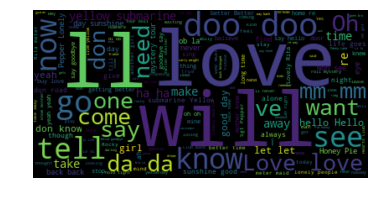

In [94]:
# Create and generate a word cloud image for most popular words in John Lennon's lyrics:
wordcloud_l = WordCloud().generate(corpus_l_str)

# Display the generated image:
plt.imshow(wordcloud_l, interpolation='bilinear')
plt.axis("off")
plt.show()

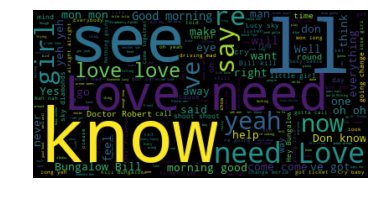

In [95]:
# Create and generate a word cloud image for most popular words in Paul McCartney's lyrics:
wordcloud_m = WordCloud().generate(corpus_m_str)

# Display the generated image:
plt.imshow(wordcloud_m, interpolation='bilinear')
plt.axis("off")
plt.show()

In [88]:
#define predictors and target
X = df_lm['lyrics']
y = df_lm['author']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [90]:
## Instantiate the vectorizer 

tf = TfidfVectorizer()

## let's transform our dataframe and get it ready for the classification process 
X_tr = tf.fit_transform(X_train)

df_lm_X_tr_text = pd.DataFrame(X_tr.toarray(), columns=tf.get_feature_names())


In [91]:
df_lm_X_tr_text

,31,50,909,aaaaah,aaaaahhhhh,aaaah,aaaahhh,able,aboard,about,...,yes,yesterday,yet,you,young,younger,your,yourself,zap,zapped
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044357,...,0.070157,0.000000,0.000000,0.049010,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.023002,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.038547,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.043441,0.000000,0.0,0.044454,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.069381,0.019190,0.000000,0.0,0.058913,0.0,0.0,0.0
5,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.524810,0.000000,0.0,0.000000,0.0,0.0,0.0
6,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.096761,0.000000,0.0,0.000000,0.0,0.0,0.0
7,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.062301,0.224018,0.000000,0.0,0.132254,0.0,0.0,0.0
8,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.078560,0.000000,0.0,0.090441,0.0,0.0,0.0
9,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.248581,0.000000,0.0,0.054509,0.0,0.0,0.0


In [92]:
#Now we will start fitting different models with mostly default parameters and see, where we get a better score.
rfc = RandomForestClassifier(max_depth=3)
rfc.fit(df_lm_X_tr_text,y_train)

C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
# Now we need to transform the test subset and get it in the same form as train subset.
X_te = tf.transform(X_test)

df_lm_X_te_text = pd.DataFrame(X_te.toarray(), columns=tf.get_feature_names())



In [94]:
print(f"mean accuracy score: {rfc.score(df_lm_X_te_text, y_test)}")

mean accuracy score: 0.6


In [95]:
lgr = LogisticRegression(penalty='l2', C=1.0)
lgr.fit(df_lm_X_tr_text, y_train)

C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
print(f"mean accuracy score: {lgr.score(df_lm_X_te_text, y_test)}")

mean accuracy score: 0.6666666666666666


In [97]:
adac = AdaBoostClassifier(n_estimators=3)
adac.fit(df_lm_X_tr_text, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=3, random_state=None)

In [98]:
print(f"mean accuracy score: {adac.score(df_lm_X_te_text, y_test)}")

mean accuracy score: 0.43333333333333335


In [99]:
neighc = KNeighborsClassifier()
neighc.fit(df_lm_X_tr_text, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [100]:
print(f"mean accuracy score: {neighc.score(df_lm_X_te_text, y_test)}")

mean accuracy score: 0.4


In [101]:
svc=SVC(probability=True)
svc.fit(df_lm_X_tr_text,y_train)

C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [102]:
print(f"mean accuracy score: {svc.score(df_lm_X_te_text, y_test)}")

mean accuracy score: 0.4


In [103]:
#For the best 3 models we create Gridsearch and try to fine tune the parameters for each of it.
models = ['Random Forest', 'AdaBoost', 'Logistic Regression']

clfs = [RandomForestClassifier(n_jobs=-1),
        AdaBoostClassifier(),
       LogisticRegression()]
        
params = {models[2]: {'C': [1.0, 5.0, 10.0, 20.0, 30.0, 50.0]},
          models[0]: {'n_estimators': [5, 10, 50, 100]},
          models[1]: {'n_estimators': [50, 55, 60, 65]}}
        

In [104]:
for name, estimator in zip(models, clfs):
    print(name)
    clf=GridSearchCV(estimator, params[name], scoring='accuracy', refit=True, n_jobs=-1, cv=5)
    clf.fit(df_lm_X_tr_text, y_train)
    print ('best params:' + str(clf.best_params_))
    print ('best scores:' + str(clf.best_score_))
    y_pred = clf.predict(df_lm_X_te_text)
    acc = accuracy_score(y_test, y_pred)
    
    print ('Accuracy: {:,.4%}'.format(acc))
    print (classification_report(y_test, y_pred, digits=4))
    

Random Forest


C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best params:{'n_estimators': 10}
best scores:0.5333333333333333
Accuracy: 53.3333%
              precision    recall  f1-score   support

           0     0.4500    0.7500    0.5625        12
           1     0.7000    0.3889    0.5000        18

   micro avg     0.5333    0.5333    0.5333        30
   macro avg     0.5750    0.5694    0.5312        30
weighted avg     0.6000    0.5333    0.5250        30

AdaBoost


C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best params:{'n_estimators': 65}
best scores:0.4777777777777778
Accuracy: 56.6667%
              precision    recall  f1-score   support

           0     0.4762    0.8333    0.6061        12
           1     0.7778    0.3889    0.5185        18

   micro avg     0.5667    0.5667    0.5667        30
   macro avg     0.6270    0.6111    0.5623        30
weighted avg     0.6571    0.5667    0.5535        30

Logistic Regression
best params:{'C': 5.0}
best scores:0.5111111111111111
Accuracy: 66.6667%
              precision    recall  f1-score   support

           0     0.5714    0.6667    0.6154        12
           1     0.7500    0.6667    0.7059        18

   micro avg     0.6667    0.6667    0.6667        30
   macro avg     0.6607    0.6667    0.6606        30
weighted avg     0.6786    0.6667    0.6697        30



C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [105]:
X_test

80       It s been a long time  Now I m coming back h...
85       When I wake up early in the morning  Lift my...
12       There is a place  Where I can go  When I fee...
95       I was alone  I took a ride  I didn t know wh...
53       Look what you re doing  I m feeling blue and...
107      Good morning  good morning  Good morning  go...
120      Love  love  love  Love  love  love  Love  lo...
29       I should have known better with a girl like ...
76       What goes on in your heart   What goes on in...
171      Oh  listen to that now  eheheh Oh look out  ...
38       Whoa I  whoa I  I got a whole lot of things ...
105      When I get older losing my hair  Many years ...
30       If I fell in love with you  Would you promis...
67       Yesterday all my troubles seemed so far away...
140      Born a poor young country boy  Mother Nature...
142      Sexy Sadie what have you done  You made a fo...
173      Boy  you re gonna carry that weight Carry th...
5        I love you   cause you

In [106]:
#So logistic regression got the best score. Let's predict target values for the test set.
y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [107]:
confusion_matrix(y_test, y_pred)

array([[ 8,  4],
       [ 6, 12]], dtype=int64)

##### With logistic regression we were able to correctly predict the author of 20 songs out of 30.

In [108]:
np.random.seed(42)

In [109]:
#Let's try to beat the Gridsearch performance by using Neural Networks with Keras.
from keras import models
from keras.models import Sequential
from keras import layers

input_dim=df_lm_X_tr_text.shape[1]

model = Sequential()
model.add(layers.Dense(600, activation='relu', input_dim=input_dim))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#num_classes=2

In [110]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [111]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [112]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [113]:
history = model.fit(df_lm_X_tr_text,
                    y_train,
                    epochs=30,
                    batch_size=1,
                    validation_data=(df_lm_X_te_text, y_test))
results = model.evaluate(df_lm_X_te_text, y_test)

Train on 90 samples, validate on 30 samples
Epoch 1/30
90/90 [==============================] - 2s 22ms/step - loss: 0.6945 - binary_accuracy: 0.5000 - val_loss: 0.7238 - val_binary_accuracy: 0.4000
Epoch 2/30
90/90 [==============================] - 2s 19ms/step - loss: 0.6210 - binary_accuracy: 0.6444 - val_loss: 0.6903 - val_binary_accuracy: 0.5000
Epoch 3/30
90/90 [==============================] - 2s 18ms/step - loss: 0.3114 - binary_accuracy: 0.9556 - val_loss: 0.5744 - val_binary_accuracy: 0.7000
Epoch 4/30
90/90 [==============================] - 2s 17ms/step - loss: 0.0559 - binary_accuracy: 1.0000 - val_loss: 0.6661 - val_binary_accuracy: 0.6667
Epoch 5/30
90/90 [==============================] - 1s 17ms/step - loss: 0.0080 - binary_accuracy: 1.0000 - val_loss: 1.1731 - val_binary_accuracy: 0.6667
Epoch 6/30
90/90 [==============================] - 1s 16ms/step - loss: 0.0011 - binary_accuracy: 1.0000 - val_loss: 1.2968 - val_binary_accuracy: 0.6667
Epoch 7/30
90/90 [========

In [114]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

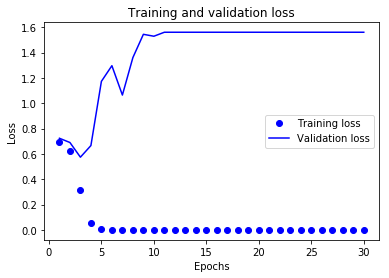

In [115]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

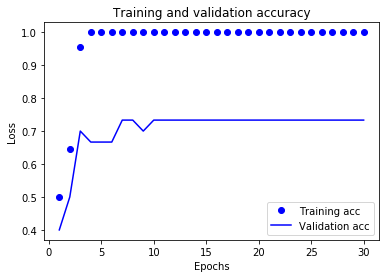

In [116]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [117]:
#We were able to beat logistic regression's score!
results

[1.5609599351882935, 0.7333333492279053]

In [118]:
y_pred=model.predict_classes(df_lm_X_te_text)
y_pred

array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [119]:
y_test

80     0
85     1
12     1
95     0
53     0
107    1
120    1
29     1
76     1
171    0
38     1
105    0
30     1
67     0
140    0
142    1
173    0
5      1
139    1
168    1
108    0
82     1
60     1
116    0
78     0
32     0
35     1
178    1
123    1
154    1
Name: author, dtype: int64

In [120]:
# With Keras we were able to predict correctly the author of 22 songs out of 30.
confusion_matrix(y_test, y_pred )

array([[ 9,  3],
       [ 5, 13]], dtype=int64)